In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("students.csv")

In [6]:
gpa_cols = [f'Sem{i} GPA' for i in range(1, 9)]

df['Total_Skor'] = (
    df['Average GPA'].fillna(0) * 10 +
    df['Attendance (%)'].fillna(0) +
    df[gpa_cols].fillna(0).sum(axis=1) * 5 -
    df['Backlogs'].fillna(0) * 5
)

df['Index_Mahasiswa'] = np.arange(1, len(df) + 1)


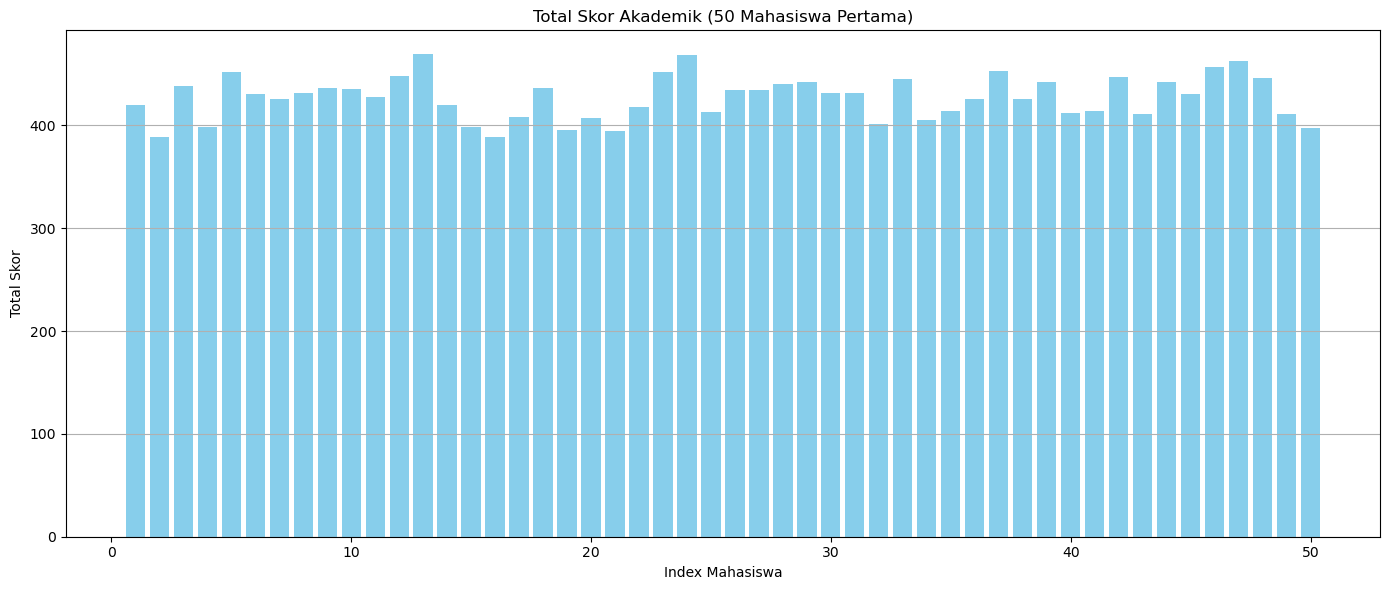

In [9]:
plt.figure(figsize=(14,6))
plt.bar(np.arange(1, 51), df['Total_Skor'][:50], color='skyblue')
plt.title("Total Skor Akademik (50 Mahasiswa Pertama)")
plt.xlabel("Index Mahasiswa")
plt.ylabel("Total Skor")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


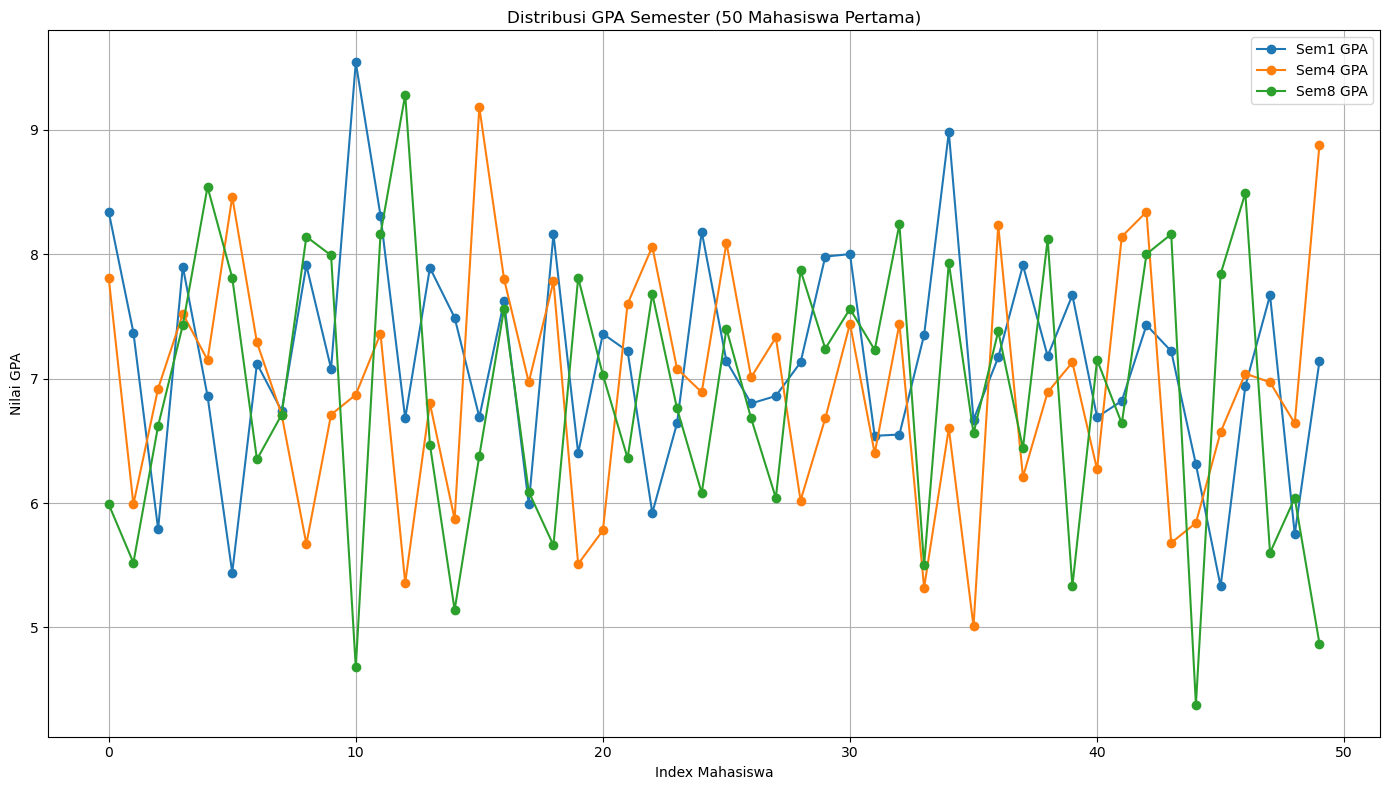

In [12]:
plt.figure(figsize=(14,8))
for sem in ['Sem1 GPA', 'Sem4 GPA', 'Sem8 GPA']:
    plt.plot(df.index[:50], df[sem][:50], marker='o', label=sem)

plt.title("Distribusi GPA Semester (50 Mahasiswa Pertama)")
plt.xlabel("Index Mahasiswa")
plt.ylabel("Nilai GPA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


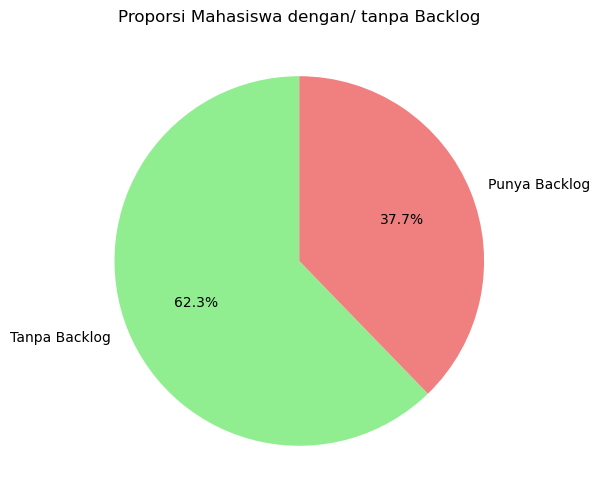

In [13]:
df['Has_Backlog'] = df['Backlogs'].fillna(0) > 0

plt.figure(figsize=(6,6))
df['Has_Backlog'].value_counts().plot.pie(
    labels=['Tanpa Backlog', 'Punya Backlog'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral']
)
plt.title("Proporsi Mahasiswa dengan/ tanpa Backlog")
plt.ylabel("")
plt.show()


In [15]:
X = df[['Index_Mahasiswa']]
y = df['Total_Skor']

model = LinearRegression()
model.fit(X, y)

index_prediksi = 250
prediksi = model.predict([[index_prediksi]])[0]
print(f"Prediksi Total Skor Mahasiswa ke-{index_prediksi}: {prediksi:,.2f}")


Prediksi Total Skor Mahasiswa ke-250: 423.94


C:\Users\Rizki Kurniawan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


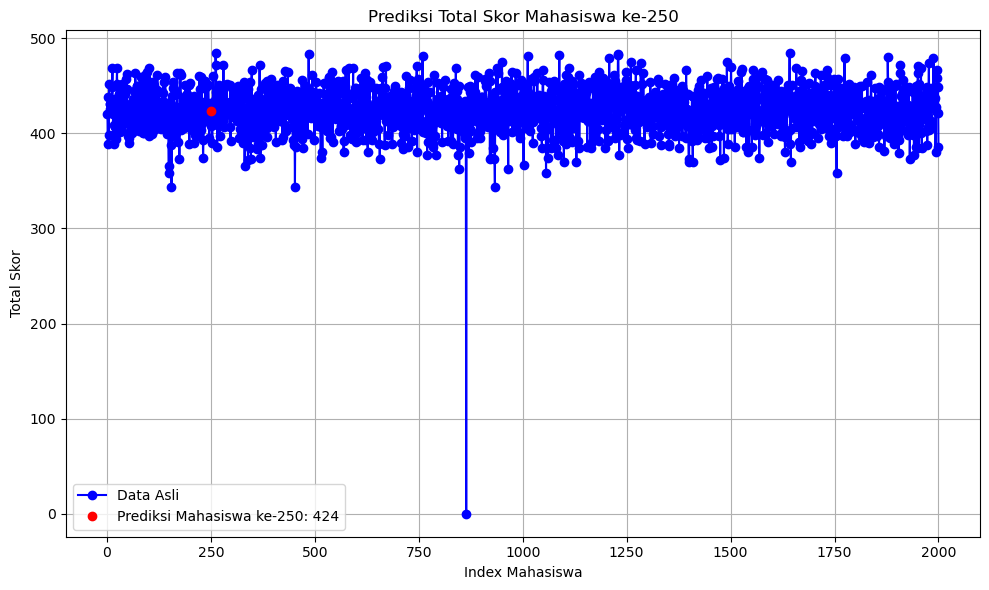

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df['Index_Mahasiswa'], y, 'bo-', label='Data Asli')
plt.plot(index_prediksi, prediksi, 'ro', label=f'Prediksi Mahasiswa ke-{index_prediksi}: {prediksi:,.0f}')
plt.xlabel("Index Mahasiswa")
plt.ylabel("Total Skor")
plt.title(f"Prediksi Total Skor Mahasiswa ke-{index_prediksi}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
